# FuzzyNetwork Demo - Iris Dataset

Demonstrate multi-class classification with FuzzyNewtwork on classic Iris dataset.

In [1]:
import sys
sys.path.append("../../src")

In [2]:
import numpy

from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras.optimizers import RMSprop
from keras.metrics import CategoricalAccuracy
from keras.losses import CategoricalCrossentropy

from sofenn import FuzzyNetwork

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 1) Load and Preprocess Data
Load Iris dataset and create X/y train/test datasets.

In [3]:
iris = datasets.load_iris()

# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = numpy.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = numpy.array(Y)
    
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

# preview datasets
print(f"X_train preview: \n{X_train[:5]}")
print(f"\ny_train preview: \n{y_train[:5]}")

X_train preview: 
[[5.5 2.4 3.7 1. ]
 [4.8 3.4 1.9 0.2]
 [6.1 2.8 4.7 1.2]
 [7.4 2.8 6.1 1.9]
 [7.9 3.8 6.4 2. ]]

y_train preview: 
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


## 2) Train FuzzyNetwork
Create FuzzyNetwork model and train on Iris data.

In [4]:
fuzz = FuzzyNetwork(
            input_shape=X_train.shape,
            neurons=3,
            num_classes=3
)
# X_train.shape = (135, 4)

In [5]:
fuzz.compile(
    loss=CategoricalCrossentropy(),
    optimizer=RMSprop(),
    metrics=[CategoricalAccuracy()]
)
fuzz.summary()

Model: "FuzzyNetwork Summary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ InputRow (InputLayer)         │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 3)                 │              24 │ InputRow[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 3)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 3)                 │              15 │ InputRow[0][0],            │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 3)                 │               3 │ Weights[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs=100
batch_size=32

fuzz.fit(X_train, y_train, 
         epochs=epochs, verbose=1, batch_size=batch_size)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.3290 - loss: 5.4827  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3594 - loss: 5.9310 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3077 - loss: 5.0972 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.3537 - loss: 5.8141 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3234 - loss: 5.3080 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3190 - loss: 5.2330 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3589 - loss: 5.8545 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3477 - loss: 5.6618 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3676 - loss: 5.9674 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3372 - loss: 5.4711 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 

## 3) Evaluate Predictions

Calculate accuracy on holdout samples.

In [7]:
y_pred = fuzz.predict(X_test)
y_pred[:5].round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[-0., -0.,  0.],
       [-0., -0.,  0.],
       [-0., -0.,  0.],
       [-0., -0.,  0.],
       [-0., -0.,  0.]], dtype=float32)

In [8]:
acc = y_test == y_pred.round()
acc[:5]

array([[ True, False,  True],
       [ True, False,  True],
       [ True,  True, False],
       [ True, False,  True],
       [ True,  True, False]])

In [9]:
acc.sum() / acc.size

np.float64(0.6666666666666666)

Calculate binary accuracy on holdout sample.

In [10]:
pred_loss, pred_bin_acc = fuzz.evaluate(X_test, y_test)
print(f'Model Loss: {pred_loss: 0.8f}')
print(f'Binary Accuracy: {100 * pred_bin_acc: 2.1f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - categorical_accuracy: 0.3333 - loss: 5.3727
Model Loss:  5.37269831
Binary Accuracy:  33.3%


## 4) Plot Results

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

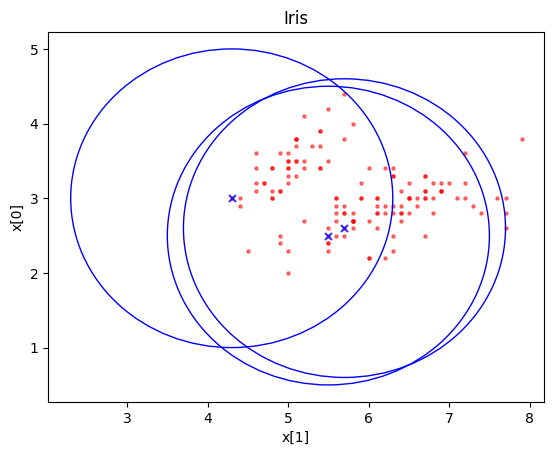

In [12]:
w = fuzz.get_layer("FuzzyRules").get_weights()


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()